# Stock Market Prediction of Nikkei 225 companies using Machine Learning Techniques

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Nikkei225.csv")
data

,Date,Price,Open,High,Low,Vol.,Change %
0,06/28/2024,"39,583.08","39,593.01","39,783.70","39,485.73",1.24B,0.61%
1,06/27/2024,"39,341.54","39,434.47","39,439.24","39,193.51",1.15B,-0.82%
2,06/26/2024,"39,667.07","39,364.73","39,788.63","39,233.56",1.09B,1.26%
3,06/25/2024,"39,173.15","38,833.90","39,215.07","38,758.07",1.08B,0.95%
4,06/24/2024,"38,804.65","38,497.42","38,905.47","38,416.07",934.57M,0.54%
...,...,...,...,...,...,...,...
4056,01/10/2008,"14,388.11","14,546.32","14,584.73","14,388.11",NaN,-1.45%
4057,01/09/2008,"14,599.16","14,364.71","14,602.65","14,271.57",NaN,0.49%
4058,01/08/2008,"14,528.67","14,429.30","14,547.80","14,365.86",NaN,0.19%
4059,01/07/2008,"14,500.55","14,549.38","14,667.85","14,438.61",NaN,-1.30%


In [3]:
data.shape

(4061, 7)

In [4]:
data=data.drop(columns=['Date'])
data

,Price,Open,High,Low,Vol.,Change %
0,"39,583.08","39,593.01","39,783.70","39,485.73",1.24B,0.61%
1,"39,341.54","39,434.47","39,439.24","39,193.51",1.15B,-0.82%
2,"39,667.07","39,364.73","39,788.63","39,233.56",1.09B,1.26%
3,"39,173.15","38,833.90","39,215.07","38,758.07",1.08B,0.95%
4,"38,804.65","38,497.42","38,905.47","38,416.07",934.57M,0.54%
...,...,...,...,...,...,...
4056,"14,388.11","14,546.32","14,584.73","14,388.11",NaN,-1.45%
4057,"14,599.16","14,364.71","14,602.65","14,271.57",NaN,0.49%
4058,"14,528.67","14,429.30","14,547.80","14,365.86",NaN,0.19%
4059,"14,500.55","14,549.38","14,667.85","14,438.61",NaN,-1.30%


In [5]:
data.describe()

,Price,Open,High,Low,Vol.,Change %
count,4061,4061,4061,4061,3180,4061
unique,4057,4025,4034,4031,2526,690
top,"9,653.92","9,404.00","9,726.50","9,376.50",1.06B,0.09%
freq,2,3,4,3,21,29


In [6]:
data.isnull().sum()

Price         0
Open          0
High          0
Low           0
Vol.        881
Change %      0
dtype: int64

In [7]:
df=data.dropna()
df

,Price,Open,High,Low,Vol.,Change %
0,"39,583.08","39,593.01","39,783.70","39,485.73",1.24B,0.61%
1,"39,341.54","39,434.47","39,439.24","39,193.51",1.15B,-0.82%
2,"39,667.07","39,364.73","39,788.63","39,233.56",1.09B,1.26%
3,"39,173.15","38,833.90","39,215.07","38,758.07",1.08B,0.95%
4,"38,804.65","38,497.42","38,905.47","38,416.07",934.57M,0.54%
...,...,...,...,...,...,...
3205,"10,071.14","10,048.00","10,103.50","10,028.50",133.18K,-0.11%
3206,"10,082.48","9,993.00","10,083.50","9,973.50",137.71K,1.10%
3207,"9,972.46","9,973.00","9,993.50","9,948.50",132.58K,0.07%
3208,"9,965.09","9,988.00","10,003.50","9,943.50",131.38K,0.98%


In [8]:
df.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3180 entries, 0 to 3209
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     3180 non-null   object
 1   Open      3180 non-null   object
 2   High      3180 non-null   object
 3   Low       3180 non-null   object
 4   Vol.      3180 non-null   object
 5   Change %  3180 non-null   object
dtypes: object(6)
memory usage: 173.9+ KB


In [10]:
df.drop(columns=['Change %'],inplace=True)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_13048\1658844372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Change %'],inplace=True)


,Price,Open,High,Low,Vol.
0,"39,583.08","39,593.01","39,783.70","39,485.73",1.24B
1,"39,341.54","39,434.47","39,439.24","39,193.51",1.15B
2,"39,667.07","39,364.73","39,788.63","39,233.56",1.09B
3,"39,173.15","38,833.90","39,215.07","38,758.07",1.08B
4,"38,804.65","38,497.42","38,905.47","38,416.07",934.57M
...,...,...,...,...,...
3205,"10,071.14","10,048.00","10,103.50","10,028.50",133.18K
3206,"10,082.48","9,993.00","10,083.50","9,973.50",137.71K
3207,"9,972.46","9,973.00","9,993.50","9,948.50",132.58K
3208,"9,965.09","9,988.00","10,003.50","9,943.50",131.38K


In [11]:
df.sample(10)

,Price,Open,High,Low,Vol.
802,"29,174.15","29,444.10","29,472.98","29,107.63",788.14M
63,"40,168.07","40,324.42","40,482.02","40,054.06",1.36B
2037,"15,751.13","15,761.57","15,778.74","15,525.49",1.30B
914,"23,433.73","23,420.07","23,441.16","23,331.40",576.64M
188,"32,571.03","32,865.56","32,939.89","32,550.65",1.08B
2676,"13,338.46","13,285.03","13,392.57","13,188.14",132.81K
2368,"17,663.22","17,481.06","17,687.70","17,476.42",125.23K
3205,"10,071.14","10,048.00","10,103.50","10,028.50",133.18K
597,"27,522.26","27,404.36","27,586.42","27,129.61",727.50M
1069,"23,523.24","23,489.78","23,561.98","23,335.99",540.38M


In [12]:
def convert_vol(vol):
    if 'K' in vol:
        return float(vol.replace('K', ''))
    elif 'M' in vol:
        return float(vol.replace('M', '')) * 1000
    elif 'B' in vol:
        return float(vol.replace('B', '')) * 1000000
    else:
        return float(vol)/1000

def convert_to_num(dt):
    if ',' in dt:
        return float(dt.replace(',',''))
    else:
        return float(dt)

In [13]:
df['Volume(K)']=df['Vol.'].apply(convert_vol)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_13048\3236443624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume(K)']=df['Vol.'].apply(convert_vol)


,Price,Open,High,Low,Vol.,Volume(K)
0,"39,583.08","39,593.01","39,783.70","39,485.73",1.24B,1240000.00
1,"39,341.54","39,434.47","39,439.24","39,193.51",1.15B,1150000.00
2,"39,667.07","39,364.73","39,788.63","39,233.56",1.09B,1090000.00
3,"39,173.15","38,833.90","39,215.07","38,758.07",1.08B,1080000.00
4,"38,804.65","38,497.42","38,905.47","38,416.07",934.57M,934570.00
...,...,...,...,...,...,...
3205,"10,071.14","10,048.00","10,103.50","10,028.50",133.18K,133.18
3206,"10,082.48","9,993.00","10,083.50","9,973.50",137.71K,137.71
3207,"9,972.46","9,973.00","9,993.50","9,948.50",132.58K,132.58
3208,"9,965.09","9,988.00","10,003.50","9,943.50",131.38K,131.38


In [14]:
df['Price']=df['Price'].apply(convert_to_num)
df['Open']=df['Open'].apply(convert_to_num)
df['High']=df['High'].apply(convert_to_num)
df['Low']=df['Low'].apply(convert_to_num)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_13048\1879019303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price']=df['Price'].apply(convert_to_num)
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_13048\1879019303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open']=df['Open'].apply(convert_to_num)
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_13048\1879019303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,Price,Open,High,Low,Vol.,Volume(K)
0,39583.08,39593.01,39783.70,39485.73,1.24B,1240000.00
1,39341.54,39434.47,39439.24,39193.51,1.15B,1150000.00
2,39667.07,39364.73,39788.63,39233.56,1.09B,1090000.00
3,39173.15,38833.90,39215.07,38758.07,1.08B,1080000.00
4,38804.65,38497.42,38905.47,38416.07,934.57M,934570.00
...,...,...,...,...,...,...
3205,10071.14,10048.00,10103.50,10028.50,133.18K,133.18
3206,10082.48,9993.00,10083.50,9973.50,137.71K,137.71
3207,9972.46,9973.00,9993.50,9948.50,132.58K,132.58
3208,9965.09,9988.00,10003.50,9943.50,131.38K,131.38


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3180 entries, 0 to 3209
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      3180 non-null   float64
 1   Open       3180 non-null   float64
 2   High       3180 non-null   float64
 3   Low        3180 non-null   float64
 4   Vol.       3180 non-null   object 
 5   Volume(K)  3180 non-null   float64
dtypes: float64(5), object(1)
memory usage: 173.9+ KB


In [16]:
df.drop(columns=['Vol.'], inplace=True)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_13048\1067798956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Vol.'], inplace=True)


,Price,Open,High,Low,Volume(K)
0,39583.08,39593.01,39783.70,39485.73,1240000.00
1,39341.54,39434.47,39439.24,39193.51,1150000.00
2,39667.07,39364.73,39788.63,39233.56,1090000.00
3,39173.15,38833.90,39215.07,38758.07,1080000.00
4,38804.65,38497.42,38905.47,38416.07,934570.00
...,...,...,...,...,...
3205,10071.14,10048.00,10103.50,10028.50,133.18
3206,10082.48,9993.00,10083.50,9973.50,137.71
3207,9972.46,9973.00,9993.50,9948.50,132.58
3208,9965.09,9988.00,10003.50,9943.50,131.38


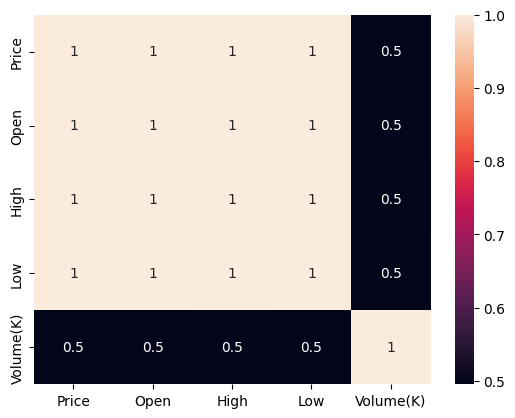

In [17]:
sns.heatmap(df.corr(),annot=True)
plt.show()

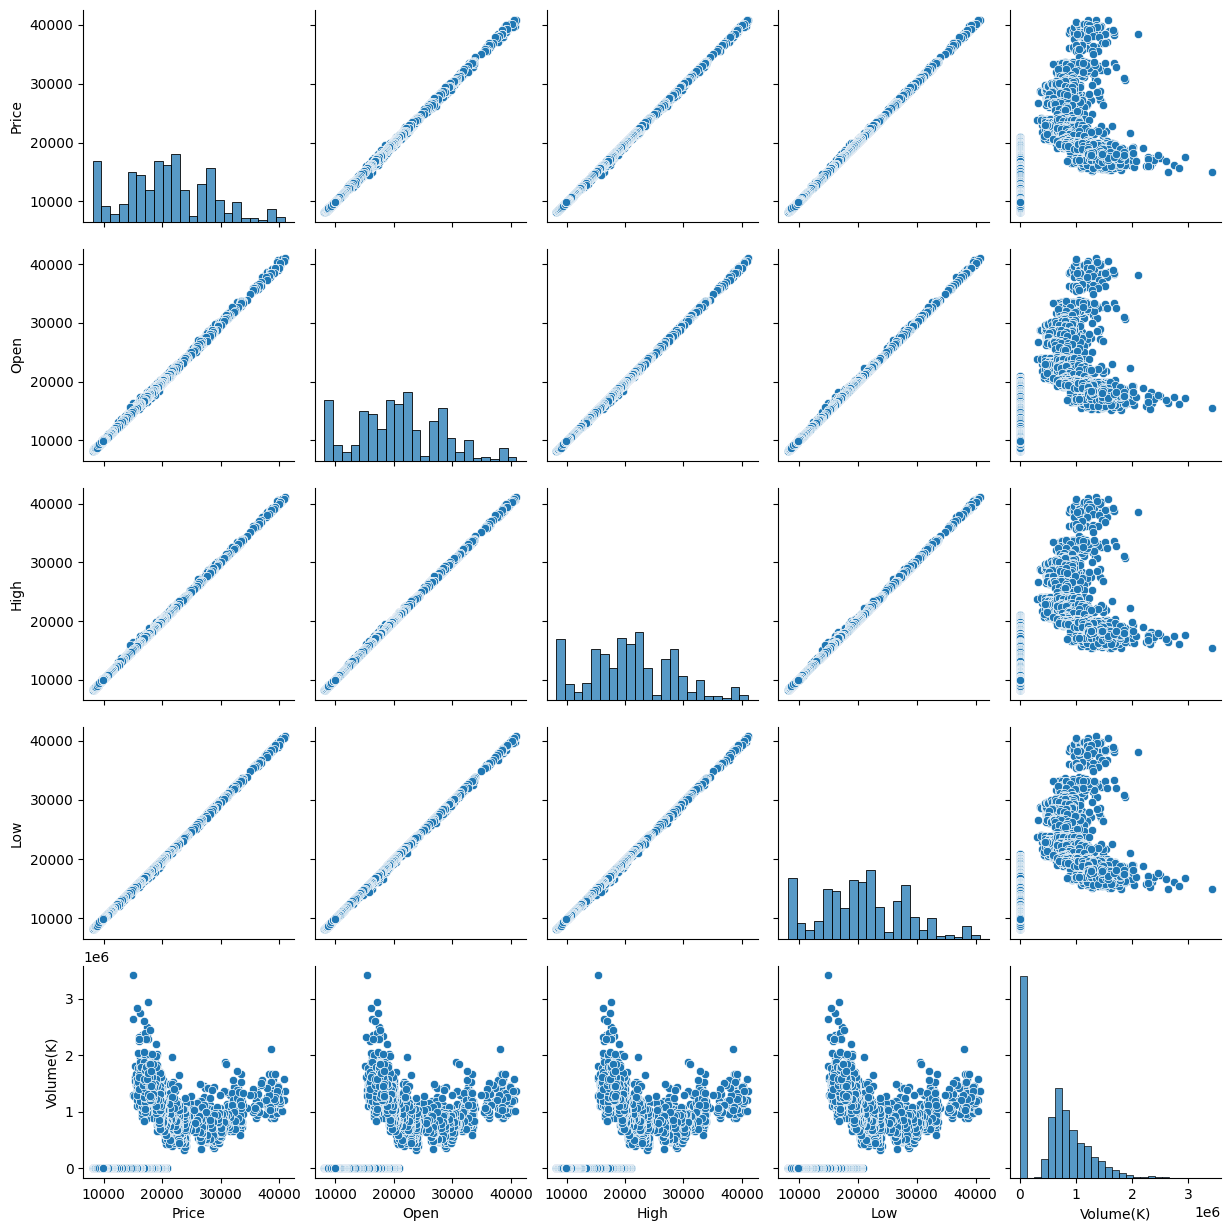

In [18]:
sns.pairplot(df,kind='scatter')
plt.show()

## Simple Linear Regression

## Taking Open as independent feature and close as dependent fearture

<function matplotlib.pyplot.show(close=None, block=None)>

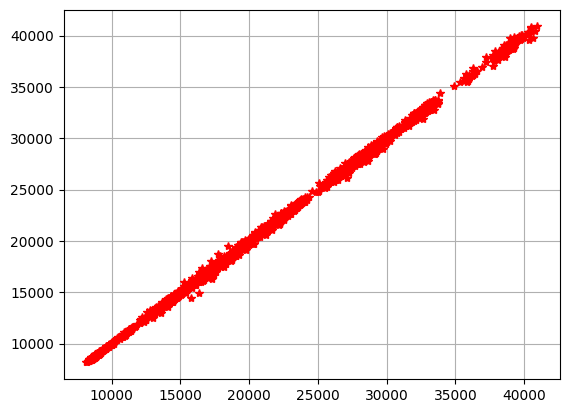

In [19]:
plt.plot(df['Open'],df['Price'],'r*')
plt.grid(True)
plt.show

In [20]:
X=df[['Open']]
X

,Open
0,39593.01
1,39434.47
2,39364.73
3,38833.90
4,38497.42
...,...
3205,10048.00
3206,9993.00
3207,9973.00
3208,9988.00


In [21]:
y=df['Price']
y

0       39583.08
1       39341.54
2       39667.07
3       39173.15
4       38804.65
          ...   
3205    10071.14
3206    10082.48
3207     9972.46
3208     9965.09
3209     9868.07
Name: Price, Length: 3180, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [24]:
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
print(f"Coefficient : {lr.coef_}\nintercept : {lr.intercept_}")

Coefficient : [0.99981768]
intercept : 1.4953564495117462


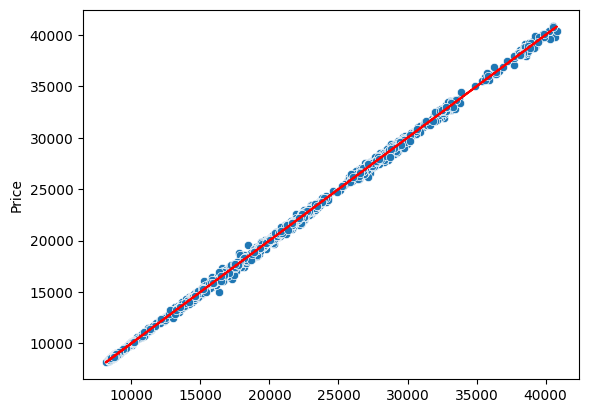

In [26]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lr.predict(X_train),color='red')
plt.show()

In [27]:
pred=lr.predict(X_test)

In [28]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [29]:
import math
def find_RMSE(pred,actual):
    return math.sqrt(mean_squared_error(actual,pred))

def find_adj_r2(pred,actual):
    return 1-((1-r2_score(pred,actual))*(len(actual)-1)/(len(actual)-X_train.shape[1]-1))

In [30]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 120.52607492682348
MSE : 29175.60442252982
RMSE : 170.8086778314551
R2 : 0.9994851471393904
Adj R2 : 0.9994831824769754


In [31]:
lr_mae=mean_absolute_error(y_test,pred)
lr_rmse=find_RMSE(pred,y_test)
lr_r2=r2_score(y_test,pred)

In [32]:
dt={
    'Simple_LinearReg' : [mean_absolute_error(y_test,pred)]}
mean_abs_err=pd.DataFrame(dt)
mean_abs_err

,Simple_LinearReg
0,120.526075


In [33]:
dt={
    'Simple_LinearReg' : [find_RMSE(pred,y_test)]
}
root_mean_sq_err=pd.DataFrame(dt)
root_mean_sq_err

,Simple_LinearReg
0,170.808678


In [34]:
dt={
    'Simple_LinearReg' : [r2_score(y_test,pred)]
}
R2_score=pd.DataFrame(dt)
R2_score

,Simple_LinearReg
0,0.999485


## Ridge Regression

In [35]:
from sklearn.linear_model import Ridge

In [36]:
rr=Ridge(alpha=0.1)

In [37]:
rr.fit(X_train,y_train)

Ridge(alpha=0.1)

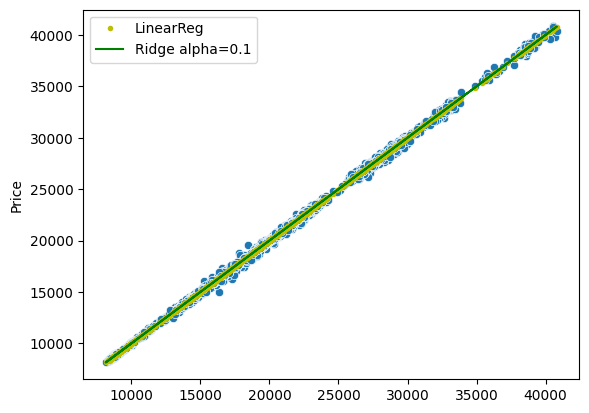

In [38]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lr.predict(X_train),'y.',label='LinearReg')
plt.plot(X_val,rr.predict(X_train),color='green',label='Ridge alpha=0.1')
plt.legend()
plt.show()

In [39]:
print(rr.coef_,rr.intercept_)

[0.99981768] 1.495356467567035


In [40]:
y_pred=rr.predict(X_test)

In [41]:
print(f"MAE : {mean_absolute_error(y_test,y_pred)}\nMSE : {mean_squared_error(y_test,y_pred)}\nRMSE : {find_RMSE(y_pred,y_test)}\nR2 : {r2_score(y_test,y_pred)}\nAdj R2 : {find_adj_r2(y_pred,y_test)}")

MAE : 120.52607492674996
MSE : 29175.604422643624
RMSE : 170.80867783178823
R2 : 0.9994851471393884
Adj R2 : 0.9994831824769725


In [42]:
rr_mae=mean_absolute_error(y_test,y_pred)
rr_rmse=find_RMSE(y_pred,y_test)
rr_r2=r2_score(y_test,y_pred)

In [43]:
mean_abs_err['Ridge_alpha_0.1']=[mean_absolute_error(y_test,y_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1
0,120.526075,120.526075


In [44]:
root_mean_sq_err['Ridge_alpha_0.1']=[find_RMSE(y_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1
0,170.808678,170.808678


In [45]:
R2_score['Ridge_alpha_0.1']=[r2_score(y_test,y_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1
0,0.999485,0.999485


## Lasso Regression

In [46]:
from sklearn.linear_model import Lasso

In [47]:
lsr=Lasso(alpha=0.1)

In [48]:
lsr.fit(X_train,y_train)

Lasso(alpha=0.1)

In [49]:
print(lsr.coef_,lsr.intercept_)

[0.99981768] 1.4953966255525302


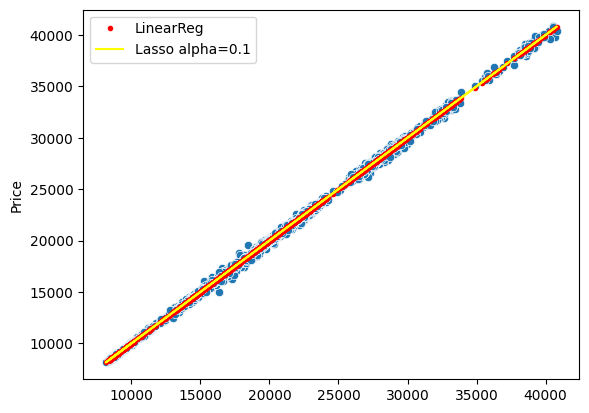

In [50]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lr.predict(X_train),'r.',label='LinearReg')
plt.plot(X_val,lsr.predict(X_train),color='yellow',label='Lasso alpha=0.1')
plt.legend()
plt.show()

In [51]:
yl_pred=lsr.predict(X_test)

In [52]:
print(f"MAE : {mean_absolute_error(y_test,yl_pred)}\nMSE : {mean_squared_error(y_test,yl_pred)}\nRMSE : {find_RMSE(yl_pred,y_test)}\nR2 : {r2_score(y_test,yl_pred)}\nAdj R2 : {find_adj_r2(yl_pred,y_test)}")

MAE : 120.52607476312147
MSE : 29175.604675675066
RMSE : 170.80867857247495
R2 : 0.9994851471349233
Adj R2 : 0.9994831824704944


In [53]:
lsr_mae=mean_absolute_error(y_test,yl_pred)
lsr_rmse=find_RMSE(yl_pred,y_test)
lsr_r2=r2_score(y_test,yl_pred)

In [54]:
mean_abs_err['Lasso_alpha_0.1']=[mean_absolute_error(y_test,yl_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1
0,120.526075,120.526075,120.526075


In [55]:
root_mean_sq_err['Lasso_alpha_0.1']=[find_RMSE(yl_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1
0,170.808678,170.808678,170.808679


In [56]:
R2_score['Lasso_alpha_0.1']=[r2_score(y_test,yl_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1
0,0.999485,0.999485,0.999485


## Polynomial Regression

In [57]:
from sklearn.preprocessing import PolynomialFeatures

In [58]:
poly=PolynomialFeatures(degree=4)

In [59]:
X_poly = poly.fit_transform(X_train)
X_test1=poly.transform(X_test)
poly.fit(X_poly,y_train)
lin=LinearRegression()
lin.fit(X_poly,y_train)

LinearRegression()

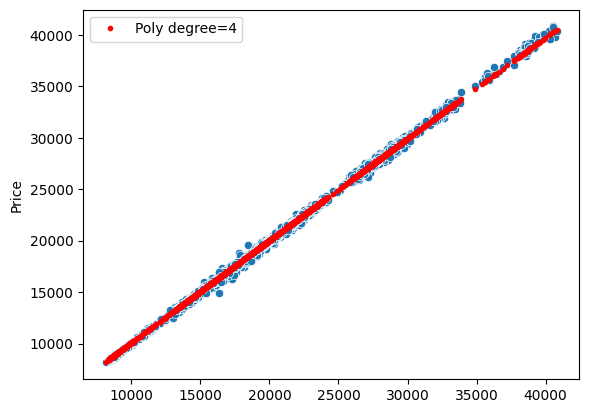

In [60]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lin.predict(X_poly),'r.',label='Poly degree=4')
plt.legend()
plt.show()

In [61]:
yp_pred=lin.predict(X_test1)

In [62]:
print(f"MAE : {mean_absolute_error(y_test,yp_pred)}\nMSE : {mean_squared_error(y_test,yp_pred)}\nRMSE : {find_RMSE(yp_pred,y_test)}\nR2 : {r2_score(y_test,yp_pred)}\nAdj R2 : {find_adj_r2(yp_pred,y_test)}")

MAE : 135.5716942643378
MSE : 35620.24194516182
RMSE : 188.73325606570194
R2 : 0.9993714206158173
Adj R2 : 0.9993572212581682


In [63]:
poly_mae=mean_absolute_error(y_test,yp_pred)
poly_rmse=find_RMSE(yp_pred,y_test)
poly_r2=r2_score(y_test,yp_pred)

In [64]:
mean_abs_err['Poly_deg_4']=[mean_absolute_error(y_test,yp_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4
0,120.526075,120.526075,120.526075,135.571694


In [65]:
root_mean_sq_err['Poly_deg_4']=[find_RMSE(yp_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4
0,170.808678,170.808678,170.808679,188.733256


In [66]:
R2_score['Poly_deg_4']=r2_score(y_test,yp_pred)
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4
0,0.999485,0.999485,0.999485,0.999371


## Ridge on Polynomial Regression

In [67]:
ridp=Ridge(alpha=0.1)
ridp.fit(X_poly,y_train)

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.14308e-40): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.1)

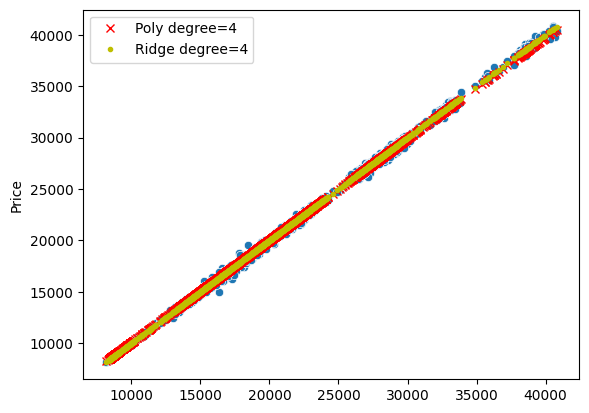

In [68]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lin.predict(X_poly),'rx',label='Poly degree=4')
plt.plot(X_val,ridp.predict(X_poly),'y.',label='Ridge degree=4')
plt.legend()
plt.show()

In [69]:
yr_pred=ridp.predict(X_test1)

In [70]:
print(f"MAE : {mean_absolute_error(y_test,yr_pred)}\nMSE : {mean_squared_error(y_test,yr_pred)}\nRMSE : {find_RMSE(yr_pred,y_test)}\nR2 : {r2_score(y_test,yr_pred)}\nAdj R2 : {find_adj_r2(yr_pred,y_test)}")

MAE : 120.58297408286597
MSE : 29163.903994358574
RMSE : 170.77442429813246
R2 : 0.9994853536132248
Adj R2 : 0.999483410951098


In [71]:
prr_mae=mean_absolute_error(y_test,yr_pred)
prr_rmse=find_RMSE(yr_pred,y_test)
prr_r2=r2_score(y_test,yr_pred)

In [72]:
mean_abs_err['Ridge_0.1_Poly_4']=[mean_absolute_error(y_test,yr_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4
0,120.526075,120.526075,120.526075,135.571694,120.582974


In [73]:
root_mean_sq_err['Ridge_0.1_Poly_4']=[find_RMSE(yr_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4
0,170.808678,170.808678,170.808679,188.733256,170.774424


In [74]:
R2_score['Ridge_0.1_Poly_4']=[r2_score(y_test,yr_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4
0,0.999485,0.999485,0.999485,0.999371,0.999485


## Lasso on polynomial of degree 4

In [75]:
lsp=Lasso(alpha=0.1)
lsp.fit(X_poly,y_train)

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.895e+07, tolerance: 1.153e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

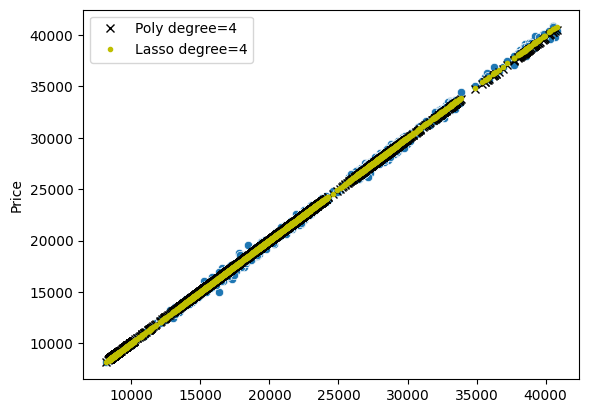

In [76]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lin.predict(X_poly),'kx',label='Poly degree=4')
plt.plot(X_val,lsp.predict(X_poly),'y.',label='Lasso degree=4')
plt.legend()
plt.show()

In [77]:
yl_pred=lsp.predict(X_test1)

In [78]:
print(f"MAE : {mean_absolute_error(y_test,yl_pred)}\nMSE : {mean_squared_error(y_test,yl_pred)}\nRMSE : {find_RMSE(yl_pred,y_test)}\nR2 : {r2_score(y_test,yl_pred)}\nAdj R2 : {find_adj_r2(yl_pred,y_test)}")

MAE : 120.62103290958144
MSE : 29173.75305924564
RMSE : 170.80325833907747
R2 : 0.9994851798098253
Adj R2 : 0.9994832197759373


In [79]:
plsr_mae=mean_absolute_error(y_test,yl_pred)
plsr_rmse=find_RMSE(yl_pred,y_test)
plsr_r2=r2_score(y_test,yl_pred)

In [80]:
mean_abs_err['Lasso_0.1_Poly_4']=[mean_absolute_error(y_test,yl_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4
0,120.526075,120.526075,120.526075,135.571694,120.582974,120.621033


In [81]:
root_mean_sq_err['Lasso_0.1_Poly_4']=[find_RMSE(yl_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4
0,170.808678,170.808678,170.808679,188.733256,170.774424,170.803258


In [82]:
R2_score['Lasso_0.1_Poly_4']=[r2_score(y_test,yl_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4
0,0.999485,0.999485,0.999485,0.999371,0.999485,0.999485


## Multiple Linear Regression

In [83]:
df

,Price,Open,High,Low,Volume(K)
0,39583.08,39593.01,39783.70,39485.73,1240000.00
1,39341.54,39434.47,39439.24,39193.51,1150000.00
2,39667.07,39364.73,39788.63,39233.56,1090000.00
3,39173.15,38833.90,39215.07,38758.07,1080000.00
4,38804.65,38497.42,38905.47,38416.07,934570.00
...,...,...,...,...,...
3205,10071.14,10048.00,10103.50,10028.50,133.18
3206,10082.48,9993.00,10083.50,9973.50,137.71
3207,9972.46,9973.00,9993.50,9948.50,132.58
3208,9965.09,9988.00,10003.50,9943.50,131.38


In [84]:
df.drop(columns=['High','Low'],inplace=True)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_13048\4086614560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['High','Low'],inplace=True)


,Price,Open,Volume(K)
0,39583.08,39593.01,1240000.00
1,39341.54,39434.47,1150000.00
2,39667.07,39364.73,1090000.00
3,39173.15,38833.90,1080000.00
4,38804.65,38497.42,934570.00
...,...,...,...
3205,10071.14,10048.00,133.18
3206,10082.48,9993.00,137.71
3207,9972.46,9973.00,132.58
3208,9965.09,9988.00,131.38


In [85]:
X=df.drop(columns=['Price'])
X

,Open,Volume(K)
0,39593.01,1240000.00
1,39434.47,1150000.00
2,39364.73,1090000.00
3,38833.90,1080000.00
4,38497.42,934570.00
...,...,...
3205,10048.00,133.18
3206,9993.00,137.71
3207,9973.00,132.58
3208,9988.00,131.38


In [86]:
y=df['Price']
y

0       39583.08
1       39341.54
2       39667.07
3       39173.15
4       38804.65
          ...   
3205    10071.14
3206    10082.48
3207     9972.46
3208     9965.09
3209     9868.07
Name: Price, Length: 3180, dtype: float64

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [88]:
mlin=LinearRegression()
mlin.fit(X_train,y_train)

LinearRegression()

In [89]:
cdf=pd.DataFrame(mlin.coef_,X.columns,columns=['coef_lin'])
cdf

,coef_lin
Open,1.000403
Volume(K),-0.000017


In [90]:
mlin.intercept_

-0.27109217957695364

In [91]:
pred=mlin.predict(X_test)

In [92]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 120.33212237862448
MSE : 29184.80103133606
RMSE : 170.83559649948853
R2 : 0.9994849848496814
Adj R2 : 0.9994824595203771


In [93]:
mlr_mae=mean_absolute_error(y_test,pred)
mlr_rmse=find_RMSE(pred,y_test)
mlr_r2=r2_score(y_test,pred)

In [94]:
mean_abs_err['Mul_LinearReg']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg
0,120.526075,120.526075,120.526075,135.571694,120.582974,120.621033,120.332122


In [95]:
root_mean_sq_err['Mul_LinearReg'] = [find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg
0,170.808678,170.808678,170.808679,188.733256,170.774424,170.803258,170.835596


In [96]:
R2_score['Mul_LinearReg']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg
0,0.999485,0.999485,0.999485,0.999371,0.999485,0.999485,0.999485


## Applying Ridge Regression on Multiple Linear Regression

In [97]:
ridm=Ridge(alpha=0.1)
ridm.fit(X_train,y_train)

Ridge(alpha=0.1)

In [98]:
cdf['coef_ridge']=ridm.coef_
cdf

,coef_lin,coef_ridge
Open,1.000403,1.000403
Volume(K),-0.000017,-0.000017


In [99]:
ridm.intercept_

-0.2710921607140335

In [100]:
pred=ridm.predict(X_test)

In [101]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 120.33212237858194
MSE : 29184.80103142547
RMSE : 170.83559649975024
R2 : 0.9994849848496798
Adj R2 : 0.9994824595203746


In [102]:
mrr_mae=mean_absolute_error(y_test,pred)
mrr_rmse=find_RMSE(pred,y_test)
mrr_r2=r2_score(y_test,pred)

In [103]:
mean_abs_err['Mul_Ridge_0.1']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1
0,120.526075,120.526075,120.526075,135.571694,120.582974,120.621033,120.332122,120.332122


In [104]:
root_mean_sq_err['Mul_Ridge_0.1']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1
0,170.808678,170.808678,170.808679,188.733256,170.774424,170.803258,170.835596,170.835596


In [105]:
R2_score['Mul_Ridge_0.1']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1
0,0.999485,0.999485,0.999485,0.999371,0.999485,0.999485,0.999485,0.999485


## Applying Lasso Regression on Multiple Linear Regression

In [106]:
lso=Lasso(alpha=0.1)
lso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [107]:
cdf['coef_lasso']=lso.coef_
cdf

,coef_lin,coef_ridge,coef_lasso
Open,1.000403,1.000403,1.000403
Volume(K),-0.000017,-0.000017,-0.000017


In [108]:
lso.intercept_

-0.2710321110316727

In [109]:
pred=lso.predict(X_test)

In [110]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 120.33212224154026
MSE : 29184.801313944405
RMSE : 170.83559732662394
R2 : 0.9994849848446944
Adj R2 : 0.9994824595125259


In [111]:
mlsr_mae=mean_absolute_error(y_test,pred)
mlsr_rmse=find_RMSE(pred,y_test)
mlsr_r2=r2_score(y_test,pred)

In [112]:
mean_abs_err['Mul_Lasso_0.1']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1
0,120.526075,120.526075,120.526075,135.571694,120.582974,120.621033,120.332122,120.332122,120.332122


In [113]:
root_mean_sq_err['Mul_Lasso_0.1']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1
0,170.808678,170.808678,170.808679,188.733256,170.774424,170.803258,170.835596,170.835596,170.835597


In [114]:
R2_score['Mul_Lasso_0.1']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1
0,0.999485,0.999485,0.999485,0.999371,0.999485,0.999485,0.999485,0.999485,0.999485


## adding more Features

In [115]:
df

,Price,Open,Volume(K)
0,39583.08,39593.01,1240000.00
1,39341.54,39434.47,1150000.00
2,39667.07,39364.73,1090000.00
3,39173.15,38833.90,1080000.00
4,38804.65,38497.42,934570.00
...,...,...,...
3205,10071.14,10048.00,133.18
3206,10082.48,9993.00,137.71
3207,9972.46,9973.00,132.58
3208,9965.09,9988.00,131.38


In [116]:
df['7DaysMavg']=df['Price'].rolling(window=7).mean().fillna(method='bfill')
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_13048\2831065476.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['7DaysMavg']=df['Price'].rolling(window=7).mean().fillna(method='bfill')
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_13048\2831065476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['7DaysMavg']=df['Price'].rolling(window=7).mean().fillna(method='bfill')


,Price,Open,Volume(K),7DaysMavg
0,39583.08,39593.01,1240000.00,39114.140000
1,39341.54,39434.47,1150000.00,39114.140000
2,39667.07,39364.73,1090000.00,39114.140000
3,39173.15,38833.90,1080000.00,39114.140000
4,38804.65,38497.42,934570.00,39114.140000
...,...,...,...,...
3205,10071.14,10048.00,133.18,10011.150000
3206,10082.48,9993.00,137.71,10026.580000
3207,9972.46,9973.00,132.58,10031.771429
3208,9965.09,9988.00,131.38,10032.050000


In [117]:
df['14DaysMavg']=df['Price'].rolling(window=14).mean().fillna(method='bfill')
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_13048\1927853552.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['14DaysMavg']=df['Price'].rolling(window=14).mean().fillna(method='bfill')
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_13048\1927853552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['14DaysMavg']=df['Price'].rolling(window=14).mean().fillna(method='bfill')


,Price,Open,Volume(K),7DaysMavg,14DaysMavg
0,39583.08,39593.01,1240000.00,39114.140000,38892.915714
1,39341.54,39434.47,1150000.00,39114.140000,38892.915714
2,39667.07,39364.73,1090000.00,39114.140000,38892.915714
3,39173.15,38833.90,1080000.00,39114.140000,38892.915714
4,38804.65,38497.42,934570.00,39114.140000,38892.915714
...,...,...,...,...,...
3205,10071.14,10048.00,133.18,10011.150000,10022.220714
3206,10082.48,9993.00,137.71,10026.580000,10024.741429
3207,9972.46,9973.00,132.58,10031.771429,10015.794286
3208,9965.09,9988.00,131.38,10032.050000,10009.728571


In [118]:
delta=df['Price'].diff()
gain=delta.where(delta>0,0)
loss=delta.where(delta<0,0)
avg_gain=gain.rolling(window=14).mean()
avg_loss=loss.rolling(window=14).mean()
rs=avg_gain/avg_loss
df['RSI']=100-(100/(1+rs))
df['RSI'].fillna(method='bfill',inplace=True)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_13048\3173424381.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI']=100-(100/(1+rs))
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_13048\3173424381.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RSI']

,Price,Open,Volume(K),7DaysMavg,14DaysMavg,RSI
0,39583.08,39593.01,1240000.00,39114.140000,38892.915714,-332.043989
1,39341.54,39434.47,1150000.00,39114.140000,38892.915714,-332.043989
2,39667.07,39364.73,1090000.00,39114.140000,38892.915714,-332.043989
3,39173.15,38833.90,1080000.00,39114.140000,38892.915714,-332.043989
4,38804.65,38497.42,934570.00,39114.140000,38892.915714,-332.043989
...,...,...,...,...,...,...
3205,10071.14,10048.00,133.18,10011.150000,10022.220714,354.585076
3206,10082.48,9993.00,137.71,10026.580000,10024.741429,1324.879569
3207,9972.46,9973.00,132.58,10031.771429,10015.794286,-332.923519
3208,9965.09,9988.00,131.38,10032.050000,10009.728571,-491.073952


<Axes: >

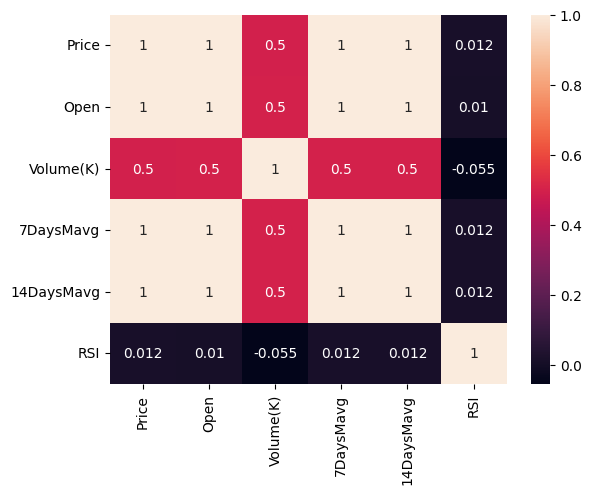

In [119]:
sns.heatmap(df.corr(),annot=True)

In [120]:
X=df.drop(columns='Price')
X

,Open,Volume(K),7DaysMavg,14DaysMavg,RSI
0,39593.01,1240000.00,39114.140000,38892.915714,-332.043989
1,39434.47,1150000.00,39114.140000,38892.915714,-332.043989
2,39364.73,1090000.00,39114.140000,38892.915714,-332.043989
3,38833.90,1080000.00,39114.140000,38892.915714,-332.043989
4,38497.42,934570.00,39114.140000,38892.915714,-332.043989
...,...,...,...,...,...
3205,10048.00,133.18,10011.150000,10022.220714,354.585076
3206,9993.00,137.71,10026.580000,10024.741429,1324.879569
3207,9973.00,132.58,10031.771429,10015.794286,-332.923519
3208,9988.00,131.38,10032.050000,10009.728571,-491.073952


In [121]:
y=df['Price']
y

0       39583.08
1       39341.54
2       39667.07
3       39173.15
4       38804.65
          ...   
3205    10071.14
3206    10082.48
3207     9972.46
3208     9965.09
3209     9868.07
Name: Price, Length: 3180, dtype: float64

In [122]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [123]:
mlin=LinearRegression()
mlin.fit(X_train,y_train)

LinearRegression()

In [124]:
cdf1=pd.DataFrame(mlin.coef_,X.columns,columns=['coef_lin'])
cdf1

,coef_lin
Open,0.764385
Volume(K),-0.000015
7DaysMavg,0.371399
14DaysMavg,-0.135381
RSI,0.000123


In [125]:
mlin.intercept_

-2.69592056194233

In [126]:
pred=mlin.predict(X_test)

In [127]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 112.61843427748882
MSE : 24005.428249671622
RMSE : 154.93685245825677
R2 : 0.9995763836380042
Adj R2 : 0.9995732622945751


In [128]:
mean_abs_err['Mul_LinearReg+']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+
0,120.526075,120.526075,120.526075,135.571694,120.582974,120.621033,120.332122,120.332122,120.332122,112.618434


In [129]:
root_mean_sq_err['Mul_LinearReg+'] = [find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+
0,170.808678,170.808678,170.808679,188.733256,170.774424,170.803258,170.835596,170.835596,170.835597,154.936852


In [130]:
R2_score['Mul_LinearReg+']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+
0,0.999485,0.999485,0.999485,0.999371,0.999485,0.999485,0.999485,0.999485,0.999485,0.999576


## Ridge

In [131]:
ridm=Ridge(alpha=0.1)
ridm.fit(X_train,y_train)

Ridge(alpha=0.1)

In [132]:
cdf1['coef_ridge']=ridm.coef_
cdf1

,coef_lin,coef_ridge
Open,0.764385,0.764385
Volume(K),-0.000015,-0.000015
7DaysMavg,0.371399,0.371399
14DaysMavg,-0.135381,-0.135381
RSI,0.000123,0.000123


In [133]:
ridm.intercept_

-2.6959205558887334

In [134]:
pred=ridm.predict(X_test)

In [135]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 112.61843427638988
MSE : 24005.42824870176
RMSE : 154.93685245512688
R2 : 0.9995763836380214
Adj R2 : 0.9995732622945915


In [136]:
mean_abs_err['Mul_Ridge_0.1+']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+
0,120.526075,120.526075,120.526075,135.571694,120.582974,120.621033,120.332122,120.332122,120.332122,112.618434,112.618434


In [137]:
root_mean_sq_err['Mul_Ridge_0.1+']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+
0,170.808678,170.808678,170.808679,188.733256,170.774424,170.803258,170.835596,170.835596,170.835597,154.936852,154.936852


In [138]:
R2_score['Mul_Ridge_0.1+']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+
0,0.999485,0.999485,0.999485,0.999371,0.999485,0.999485,0.999485,0.999485,0.999485,0.999576,0.999576


## Lasso

In [139]:
lso=Lasso(alpha=0.1)
lso.fit(X_train,y_train)

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.026e+07, tolerance: 1.153e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [140]:
cdf1['coef_lasso']=lso.coef_
cdf1

,coef_lin,coef_ridge,coef_lasso
Open,0.764385,0.764385,0.813592
Volume(K),-0.000015,-0.000015,-0.000015
7DaysMavg,0.371399,0.371399,0.261278
14DaysMavg,-0.135381,-0.135381,-0.074432
RSI,0.000123,0.000123,0.000139


In [141]:
lso.intercept_

-3.930666275009571

In [142]:
pred=lso.predict(X_test)

In [143]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 111.42566996536402
MSE : 23691.50397756605
RMSE : 153.92044691192282
R2 : 0.999581923362466
Adj R2 : 0.9995787755037684


In [144]:
mean_abs_err['Mul_Lasso_0.1+']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+,Mul_Lasso_0.1+
0,120.526075,120.526075,120.526075,135.571694,120.582974,120.621033,120.332122,120.332122,120.332122,112.618434,112.618434,111.42567


In [145]:
root_mean_sq_err['Mul_Lasso_0.1+']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+,Mul_Lasso_0.1+
0,170.808678,170.808678,170.808679,188.733256,170.774424,170.803258,170.835596,170.835596,170.835597,154.936852,154.936852,153.920447


In [146]:
R2_score['Mul_Lasso_0.1+']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+,Mul_Lasso_0.1+
0,0.999485,0.999485,0.999485,0.999371,0.999485,0.999485,0.999485,0.999485,0.999485,0.999576,0.999576,0.999582
